<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW10/HW10clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn.preprocessing import scale
from sklearn import cluster
import scipy as sp
from scipy import spatial
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv')
genes =genes.drop(columns=['Unnamed: 0'])

In [166]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [167]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

In [168]:
genes.shape

(4224, 74)

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [169]:
scaledgenes = scale(genes)
scaledgenes

array([[-0.10390895, -1.44631227,  0.54115292, ...,  1.13208158,
         0.49320283,  0.95276799],
       [-0.73943251,  0.53879462,  0.69516384, ...,  0.95494912,
        -0.6950822 ,  0.5877214 ],
       [ 0.01024745, -0.52957084, -0.45538124, ..., -0.40602471,
        -0.51034181, -0.08564642],
       ...,
       [ 0.00563416,  0.42958277, -0.26605602, ...,  0.58686221,
         0.25470697, -0.12942973],
       [-0.9117855 ,  0.45020596, -0.87974112, ...,  0.50842701,
         0.26562461,  0.29644913],
       [-1.61885048, -0.07257629, -0.65427304, ..., -0.36455808,
        -1.06687976, -0.55175871]])

In [170]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [0]:
from sklearn.manifold import TSNE 

In [0]:
twodproj = skl.manifold.TSNE(n_components=2, random_state=0)
twodproj1 = twodproj.fit_transform(scaledgenes)

In [173]:
twodproj1.shape

(4224, 2)

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

2.3 plot the TSNE projection


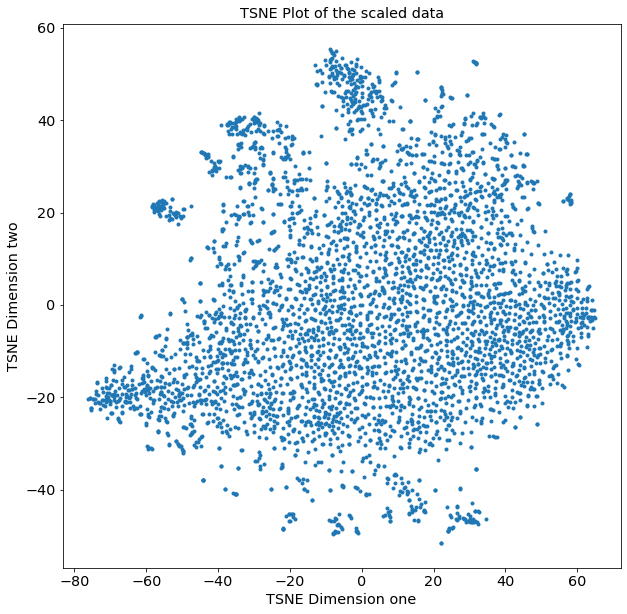

In [174]:
pl.figure(figsize= (10,10))
pl.plot(twodproj1[:,0], twodproj1[:,1], '.')
pl.xlabel('TSNE Dimension one',fontsize= 'x-large')
pl.ylabel('TSNE Dimension two', fontsize= 'x-large')
pl.title('TSNE Plot of the scaled data', fontsize= 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 1**: Graph of the the genes data scaled and projected into the 2D a dimensional plane.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
#delete
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

312576.00000000006
251076.64173410618
231187.35509465548
232166.0233257861
232208.4769098817
226408.68169421615
226644.13993309592
224520.6211586187
221404.23196156794
221211.29909492724


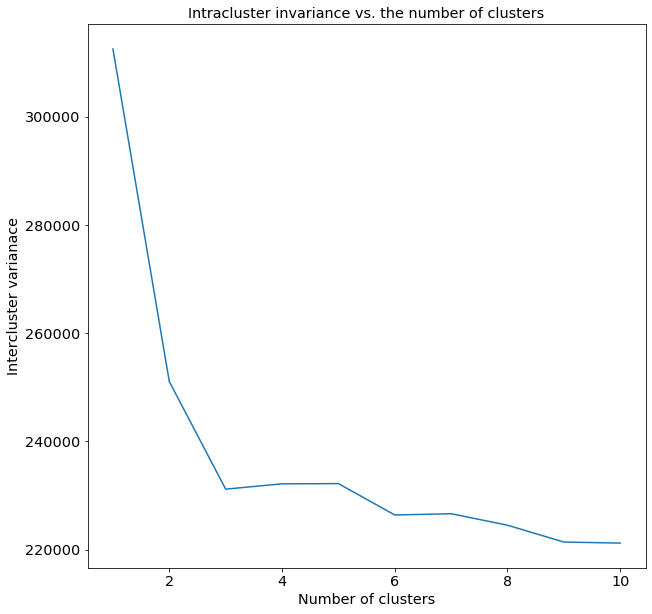

In [176]:
tv =  []
for i in range(1, 11):
    km = skl.cluster.k_means(scaledgenes, i)
    tv.append(calICVar(scaledgenes, km[1]))

pl.figure(figsize= (10,10))   
pl.plot(range(1,11), tv)
pl.ylabel('Intercluster varianace', fontsize= 'x-large')
pl.xlabel('Number of clusters', fontsize= 'x-large')
pl.title('Intracluster invariance vs. the number of clusters', fontsize = 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 2:** The graph shows how the intracluster variance changes based on the number of clusters. We can notice and that we get the elbow shape, where the point that it starts to flat is where the number of clusters is 3. Therefore we would expect to see three clusters in the data set.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

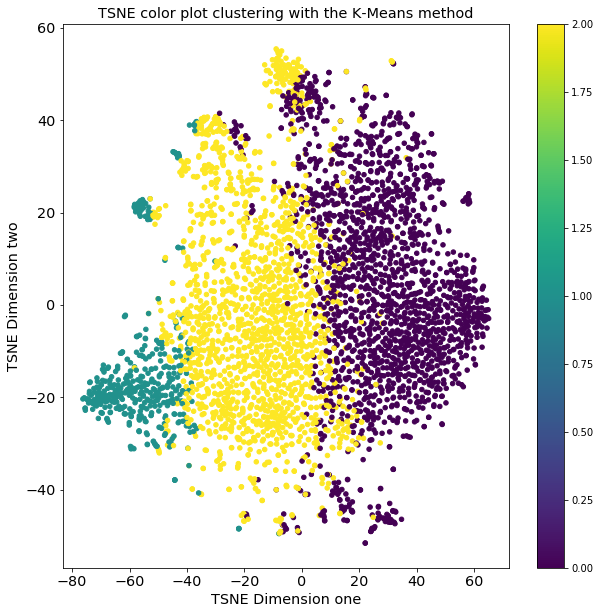

In [177]:
pl.figure(figsize=(10,10))
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=geneclustersKM.labels_, s = 20)
pl.colorbar();
pl.xlabel('TSNE Dimension one', fontsize= 'x-large')
pl.ylabel('TSNE Dimension two', fontsize= 'x-large')
pl.title('TSNE color plot clustering with the K-Means method', fontsize= 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 3:** The plot is the same one as in the previous figure but with as a color plot that categorizes the data points based on their clusters that the K-Means clustering found when we gave it our scaled genes data.

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [0]:
#refrence from the lab
dm = sp.spatial.distance.pdist(scaledgenes,metric = 'euclidean')

Text(0.5, 1.0, 'Distance Matrix color plot')

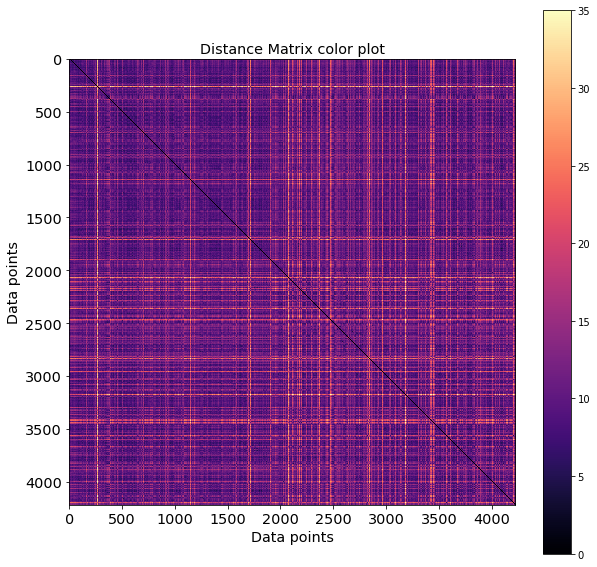

In [179]:
pl.figure(figsize=(10,10))
pl.imshow(sp.spatial.distance.squareform(dm), cmap = 'magma', vmax= 35)
pl.colorbar()
pl.xlabel('Data points', fontsize = 'x-large')
pl.ylabel('Data points', fontsize = 'x-large')
pl.tick_params(labelsize= 'x-large')
pl.title('Distance Matrix color plot', fontsize = 'x-large')

**Figure 4:** Color plot of the distance matrix, that represents the distance from each data point to one another. The black line in the middle represents the diagonal of the matrix, which the distance from the data point to itself; that is the reason why there is black diagonal line in the middle of the plot. The bright lines represent the outliers because they are further from all data points.

<span style="color:red">**-5 pts: missing the question: is there structure?**</span>

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

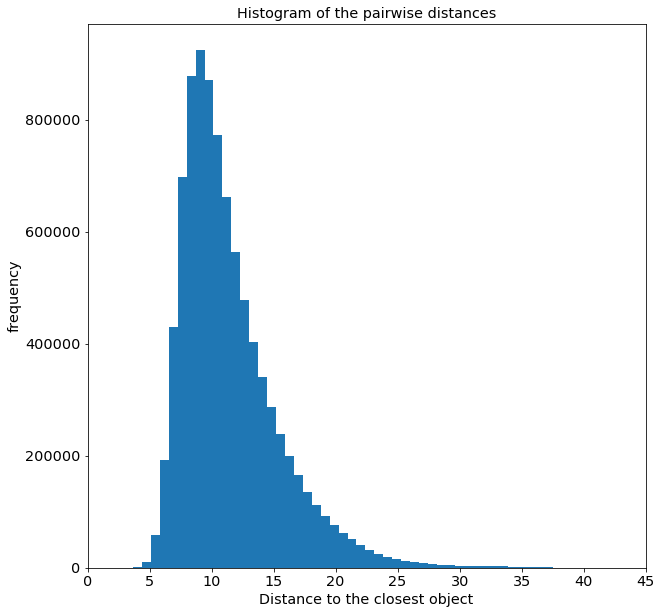

In [180]:
pl.figure(figsize=(10,10))
pl.hist(dm, bins=100);
pl.ylabel("frequency", fontsize='x-large')
pl.xlabel("Distance to the closest object", fontsize = 'x-large')
pl.title('Histogram of the pairwise distances', fontsize ='x-large')
pl.xlim(0, 45)
pl.tick_params(labelsize= 'x-large')

**Figure 5:** Histogram of the pairwise distances that represents the frequency that the points have a certain distance from one another. The peak of the histogram appears to be around a distance of about 10 or 9 to the closest object.

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

### **4a.3:**

In [181]:
dbs = skl.cluster.DBSCAN(eps= 5.5, min_samples=22)
dbs.fit(scaledgenes)
set(dbs.labels_)

{-1, 0, 1, 2}

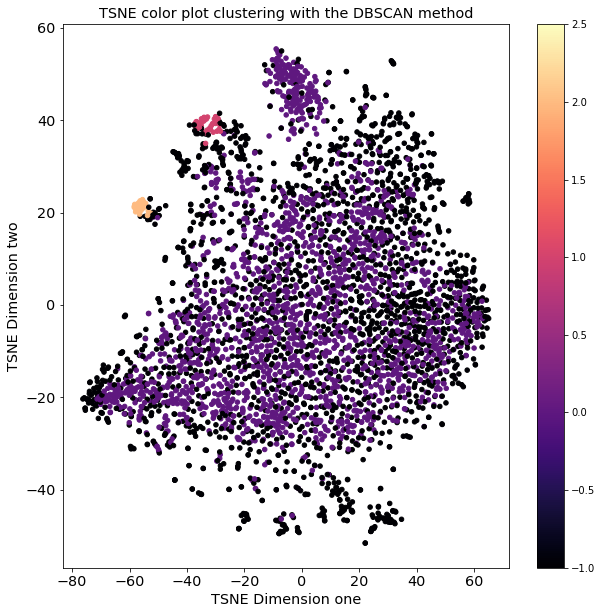

In [182]:
pl.figure(figsize=(10,10))
pl.scatter(twodproj1[:,0],twodproj1[:,1], c=dbs.labels_, s = 20, cmap='magma', vmax=2.5)
pl.colorbar();
pl.xlabel('TSNE Dimension one', fontsize='x-large')
pl.ylabel('TSNE Dimension two', fontsize='x-large')
pl.title('TSNE color plot clustering with the DBSCAN method', fontsize= 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 6:** The color plot shows the clustering using the DBSCAN clustering. The result is the best one that we were able to find after changing the hypermaters to reduce the amount of noise and get more data points to be clustered. The plot does show some of the higher dimensionality of the dataset, but the high quantity of noise makes this clustering less useful, where Cluster "-1" is noise, and clusters "0-2" are clusters found by the algorithm.



###  **4a.4:**


In [183]:
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of clusters:', n_clusters_ )
print('\nNumber of outliers:', n_noise_)

Number of clusters: 3

Number of outliers: 2110


We have 3 clusters, which is the same value that we found when doing the K-Means clustering, but the number of ouTliers is significant since it represents about half of all our datapoints. This gives us evidence that the DBSCAN method wasn't very effective at clustering the 74 dimensional data set, probably because it's higher the dimensionality. The previous color plot gave us a good idea of the high presence of noise, and even by altering their hypermaters to be as suitable as the possible we were not able to get rid of most of the noise.

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [0]:
linksgene = linkage(scaledgenes, method='ward')

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
sp.cluster.hierarchy.set_link_color_palette(['C0','C1','C2','C3','C4','C5'])

Text(0.5, 1.0, 'Dendogram using the ward method')

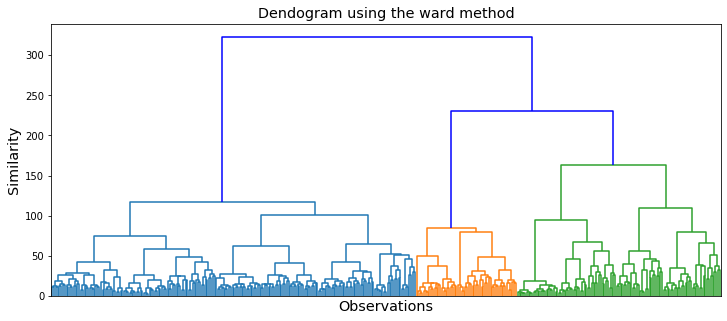

In [192]:
pl.figure(figsize=(12,5))
dendrogram(linksgene, p=8, truncate_mode='level', no_labels=True)
pl.xlabel('Observations', fontsize= 'x-large')
pl.ylabel('Similarity', fontsize =  'x-large')
pl.title('Dendogram using the ward method', fontsize ='x-large')

**Fifure 7:** Dendrogram of Ward-Agglomerative-Clustering of the data. The Ward algorithm minimizes the intracluster variance at each step. Each cluster is represented by the different colors of the branches, where we can see that the algorithm splits the data in 3 clusters.

4b.3 repeat with a different linkage and comment on differences

In [0]:
linksgene2 = linkage(scaledgenes, method='complete')

Text(0.5, 1.0, 'Dendogram using the complete method')

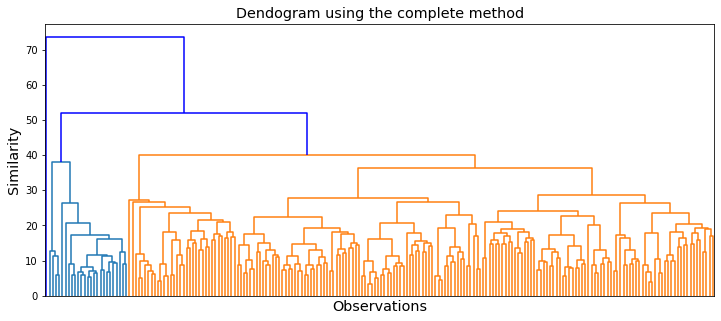

In [193]:
pl.figure(figsize=(12,5))
dendrogram(linksgene2, p=10, truncate_mode='level', no_labels=True);
pl.xlabel('Observations', fontsize= 'x-large')
pl.ylabel('Similarity', fontsize =  'x-large')
pl.title('Dendogram using the complete method', fontsize ='x-large')

**Figure 8:** Dendogram using the 'complete' distance metric: the distance between two clusters was calculated using the maximum distance between two elements of those clusters. Just as before the colors represnt the different clusters, but this mehtod only splited the data in 2 clusters.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

312576.00000000006
265786.21130934544
240649.59622656365
240557.2366028278
239961.49171955144
235074.38528557075
234083.16084309437
232028.39531397203
228615.8484280025
228470.48992579285


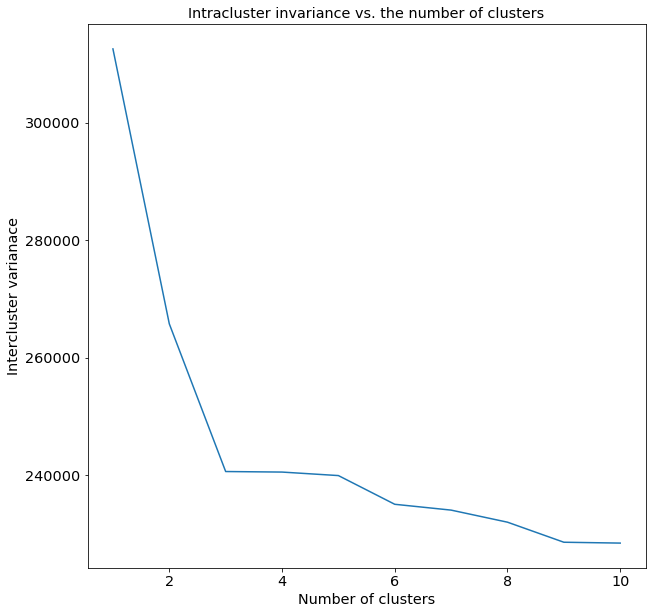

In [190]:
tv_ag = []

np.random.seed(180135)

for i in range(1, 11):
    agger = skl.cluster.AgglomerativeClustering(n_clusters = i).fit(
        scaledgenes)
    km = agger.labels_
    tv_ag.append(calICVar(scaledgenes, agger.labels_))

pl.figure(figsize=(10,10))
pl.plot(range(1,11), tv_ag)

pl.ylabel('Intercluster varianace', fontsize= 'x-large')
pl.xlabel('Number of clusters', fontsize= 'x-large')
pl.title('Intracluster invariance vs. the number of clusters', fontsize = 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 9:** Another graph of the intracluster variance changes based on the number of clusters. Just as in Figure 2, we see that the elbow happens when the number of clusters becomes 3.

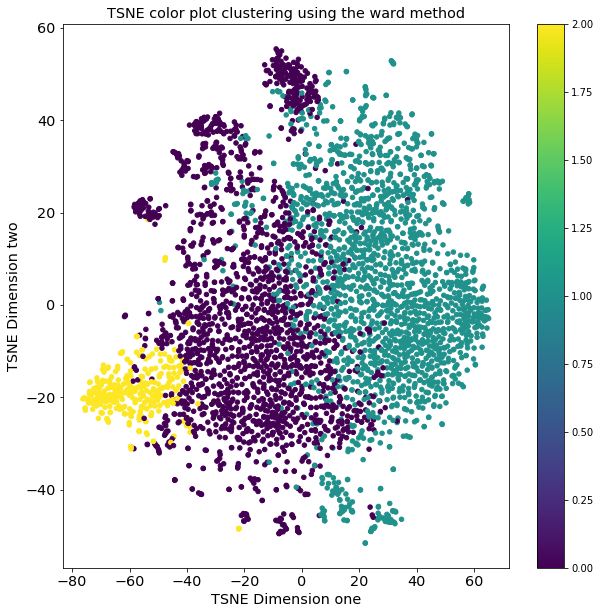

In [191]:
pl.figure(figsize=(10,10))
genes_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(scaledgenes)

pl.scatter(twodproj1[:,0], twodproj1[:,1], c=genes_agcluster.labels_, s = 20)
pl.colorbar();
pl.xlabel('TSNE Dimension one', fontsize='x-large')
pl.ylabel('TSNE Dimension two', fontsize='x-large')
pl.title('TSNE color plot clustering using the ward method', fontsize= 'x-large')
pl.tick_params(labelsize= 'x-large')

**Figure 10:** The color plot shows the clustering using the Aglomerative Ward mehtod. This plot looks very similar to the one obtained using the K-Means, and it seems to be much better at clustering the data than the DBSCAN.

<span style="color:red">**+10*35/40=8.75 pts: AC score is higher than DBSCAN, so AC as required and DBSCAN as EC**</span>